In [1]:
# import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load data
df = pd.read_csv('../Data/Week1_challenge_data_source(CSV).csv', na_values=['?', None])
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [5]:
df['Start']=pd.to_datetime(df['Start'])
df['End']=pd.to_datetime(df['End'])

In [6]:
df.dtypes


Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [7]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [8]:
# number of data points
print(f" The dataset have {df.shape[0]} rows and {df.shape[1]} columns")

 The dataset have 150001 rows and 55 columns


In [9]:
df['Last Location Name'].value_counts()

D41377B                  80
D17085A                  59
D72396C                  57
9.16456698599501E+015    55
D73604C                  55
                         ..
T87838C                   1
U79699A                   1
D10684A                   1
L33407B                   1
D30674B                   1
Name: Last Location Name, Length: 45547, dtype: int64

In [10]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The Diabetes dataset contains 12.5 % missing values.


In [11]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [12]:
# drop columns with more than 30% missing values
df_clean = df.drop(['TCP DL Retrans. Vol (Bytes)', 
                    'TCP UL Retrans. Vol (Bytes)', 
                    'HTTP DL (Bytes)', 
                    'HTTP UL (Bytes)', 
                    'Nb of sec with 125000B < Vol DL',
                    'Nb of sec with 1250B < Vol UL < 6250B',
                    'Nb of sec with 31250B < Vol DL < 125000B',
                    'Nb of sec with 37500B < Vol UL',
                    'Nb of sec with 6250B < Vol DL < 31250B',
                    'Nb of sec with 6250B < Vol UL < 37500B',
                    ], axis=1)
df_clean.shape

(150001, 45)

In [13]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [14]:
df_clean=df_clean.dropna(subset=['Bearer Id','IMSI','MSISDN/Number'])

In [15]:
df_clean.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [16]:
df_clean.shape

(148506, 45)

In [17]:
# skewness along the index axis
df_clean.skew(axis = 0, skipna = True)

Bearer Id                           0.021237
Start ms                            0.000563
End ms                             -0.000781
Dur. (ms)                           3.968797
IMSI                             -269.349864
MSISDN/Number                     331.677128
IMEI                                1.068191
Avg RTT DL (ms)                    66.662058
Avg RTT UL (ms)                    28.622886
Avg Bearer TP DL (kbps)             2.589861
Avg Bearer TP UL (kbps)             4.499001
DL TP < 50 Kbps (%)                -2.301697
50 Kbps < DL TP < 250 Kbps (%)      3.281417
250 Kbps < DL TP < 1 Mbps (%)       4.576173
DL TP > 1 Mbps (%)                  5.358695
UL TP < 10 Kbps (%)                -8.995678
10 Kbps < UL TP < 50 Kbps (%)      10.959567
50 Kbps < UL TP < 300 Kbps (%)     21.857128
UL TP > 300 Kbps (%)               36.095001
Activity Duration DL (ms)           5.852521
Activity Duration UL (ms)           7.357988
Dur. (ms).1                         3.968797
Nb of sec 

In [18]:
#filling with the median

def fix_missing_median(df, col):
    df[col] = df[col].fillna(df_clean[col].median())
    return df[col]

def fix_missing_mode(df, col):
    df[col] = df[col].fillna(df_clean[col].mode()[0])
    return df[col]

#fill with median for skewed cols
columns_list=['Avg RTT DL (ms)',                 
                'Avg RTT UL (ms)',
                'DL TP < 50 Kbps (%)',            
                '50 Kbps < DL TP < 250 Kbps (%)',  
                '250 Kbps < DL TP < 1 Mbps (%)',  
                'DL TP > 1 Mbps (%)',               
                'UL TP < 10 Kbps (%)',           
                '10 Kbps < UL TP < 50 Kbps (%)',     
                '50 Kbps < UL TP < 300 Kbps (%)',  
                'UL TP > 300 Kbps (%)',
                'Nb of sec with Vol DL < 6250B' ,    
                'Nb of sec with Vol UL < 1250B']              
for col in columns_list:
    df_clean[col] = fix_missing_median(df_clean, col)


# fill with mode 
df_clean['Last Location Name'] = fix_missing_mode(df_clean, 'Last Location Name')


In [19]:
df_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [20]:
# Top 10 Handset used by customers
df_clean['Handset Type'].value_counts()[0:10]

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: Handset Type, dtype: int64

In [21]:
# Top 3 Handset Manufacturers
df_clean['Handset Manufacturer'].value_counts()[0:3]

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

In [22]:
# Row selection based on top 3 Handset manufacturers
df_top = df.loc[df['Handset Manufacturer'].isin(['Apple','Samsung','Huawei'])]

In [23]:
df_top1 = df.loc[df['Handset Manufacturer']=='Apple']
df_top2 = df.loc[df['Handset Manufacturer']=='Samsung']
df_top3 = df.loc[df['Handset Manufacturer']=='Huawei']

In [24]:
# Top 5 handset per top 3 handset manufacturer
df_top['Handset Type'].value_counts()[0:5]

Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
Name: Handset Type, dtype: int64

In [25]:
# Top 5 handset of apple 
df_top1['Handset Type'].value_counts()[0:5]

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [26]:
# Top 5 handset of samsung 
df_top2['Handset Type'].value_counts()[0:5]

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [27]:
# Top 5 handset of Huawei
df_top3['Handset Type'].value_counts()[0:5]

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

In [28]:
Users = df_clean.groupby(['IMSI'])
xDR_users = df_clean['IMSI'].value_counts()
session_duration = Users['Dur. (ms)'].sum()
Total_session_UL = Users['Total UL (Bytes)'].sum()
Total_session_DL = Users['Total DL (Bytes)'].sum()
Total_Download_Social = Users['Social Media DL (Bytes)'].sum() + Users['Social Media UL (Bytes)'].sum()
Total_Download_Google = Users['Google DL (Bytes)'].sum() + Users['Google UL (Bytes)'].sum()
Total_Download_Email = Users['Email DL (Bytes)'].sum() + Users['Email UL (Bytes)'].sum()
Total_Download_Youtube = Users['Youtube DL (Bytes)'].sum() + Users['Youtube UL (Bytes)'].sum()
Total_Download_Netflix = Users['Netflix DL (Bytes)'].sum() + Users['Netflix UL (Bytes)'].sum()
Total_Download_Gaming = Users['Gaming DL (Bytes)'].sum() + Users['Gaming UL (Bytes)'].sum()
Total_Download_Other = Users['Other DL (Bytes)'].sum() + Users['Other DL (Bytes)'].sum()
df_new = pd.concat([xDR_users,
                 session_duration,
                 Total_session_UL,
                 Total_session_DL,
                 Total_Download_Social,
                 Total_Download_Google,
                 Total_Download_Email,
                 Total_Download_Youtube,
                 Total_Download_Netflix,
                 Total_Download_Gaming,
                 Total_Download_Other
                ], axis="columns", sort=True)

df_new = df_new.rename(columns={0: 'Social media total volume'})
df_new = df_new.rename(columns={1: 'Google total volume'})
df_new = df_new.rename(columns={2: 'Email total volume'})
df_new = df_new.rename(columns={3: 'Youtube total volume'})
df_new = df_new.rename(columns={4: 'Netflix total volume'})
df_new = df_new.rename(columns={5: 'Gaming total volume'})
df_new = df_new.rename(columns={'Other DL (Bytes)': 'Other source total volume'})
df_new = df_new.rename(columns={'IMSI': 'number of sessions'})
df_new.head()

,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume
2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,7.783194e+08
2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,9.353562e+08
2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,1.000089e+09
2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,6.018057e+08
2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,2.111738e+09


In [29]:

df_new.describe()

,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume
count,106470.000000,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05
mean,1.394815,1.465729e+05,5.735394e+07,6.341724e+08,2.549815e+06,1.089081e+07,3.151151e+06,3.158202e+07,3.156348e+07,6.002642e+08,1.174860e+09
std,0.806998,1.865631e+05,3.569691e+07,4.649890e+08,1.909688e+06,7.552392e+06,2.224584e+06,2.131570e+07,2.130937e+07,4.495647e+08,8.882734e+08
min,1.000000,7.142000e+03,2.866892e+06,8.827082e+06,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,6.580000e+03
25%,1.000000,7.240250e+04,3.640221e+07,3.149852e+08,1.211961e+06,5.945747e+06,1.675397e+06,1.863620e+07,1.857016e+07,2.882425e+08,5.544342e+08
50%,1.000000,1.031375e+05,4.681314e+07,5.707337e+08,2.305230e+06,9.592756e+06,2.801152e+06,2.681640e+07,2.673120e+07,5.426925e+08,1.060426e+09
75%,2.000000,1.727990e+05,6.586156e+07,8.078465e+08,3.309046e+06,1.322321e+07,3.849029e+06,3.795792e+07,3.800261e+07,7.777097e+08,1.531335e+09
max,18.000000,1.855375e+07,7.295774e+08,8.156743e+09,4.337478e+07,1.521919e+08,4.241878e+07,4.529588e+08,3.995191e+08,7.749432e+09,1.605095e+10


In [30]:
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

In [31]:
cols=['number of sessions',
      'Dur. (ms)',
      'Total UL (Bytes)',
      'Total DL (Bytes)',
      'Social media total volume',
      'Google total volume',
      'Email total volume',
      'Youtube total volume',
      'Netflix total volume',
      'Gaming total volume',
      'Other source total volume']              
for col in cols:
    df_clean[col] = fix_outlier(df_new, col)
    
df_new.head()

,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume
2.040471e+14,1.0,103137.5,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,7.783194e+08
2.040808e+14,1.0,103137.5,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,9.353562e+08
2.082001e+14,1.0,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,1.000089e+09
2.082001e+14,1.0,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,6.018057e+08
2.082001e+14,2.0,103137.5,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,2.111738e+09


In [32]:
#scaling
df_new = (df_new-df_new.min())/(df_new.max()-df_new.min())
df_new.head(10)
df_new.head()

,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume
2.040471e+14,0.0,0.264407,0.473213,0.046966,0.254024,0.371067,0.460031,0.576551,0.404528,0.029848,0.275142
2.040808e+14,0.0,0.264407,0.282905,0.125028,0.117374,0.420391,0.208658,0.167638,0.372717,0.124059,0.330656
2.082001e+14,0.0,0.217257,0.418476,0.015158,0.513338,0.064052,0.505374,0.279424,0.446649,0.006155,0.353539
2.082001e+14,0.0,0.217904,0.252398,0.258183,0.423592,0.556749,0.532902,0.360910,0.389562,0.239962,0.212742
2.082001e+14,0.5,0.264407,0.562523,0.640558,0.563325,0.470006,0.770184,0.194169,0.806735,0.640304,0.746519


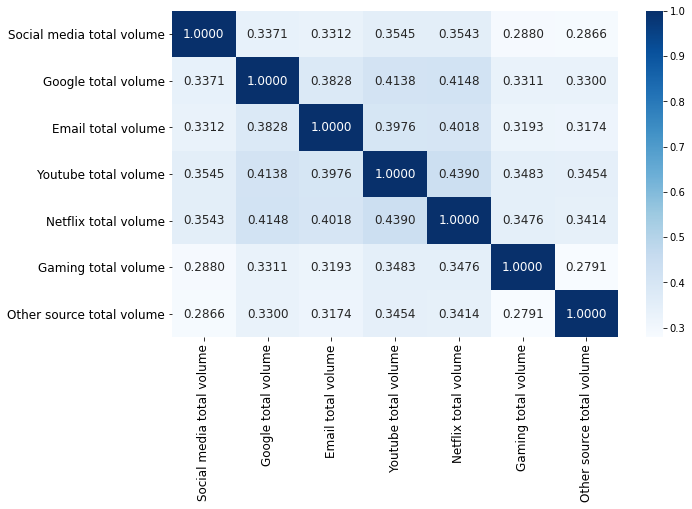

In [33]:
new=df_new[['Social media total volume',
                'Google total volume',
                'Email total volume',
                'Youtube total volume',
                'Netflix total volume',
                'Gaming total volume',
                'Other source total volume']]

corrMatrix = new.corr()
f, ax = plt.subplots(figsize=(10, 6))
res=sns.heatmap(corrMatrix,cmap="Blues",annot=True,fmt='.4f',annot_kws={"size":12})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
plt.show()

<AxesSubplot:xlabel='Dur. (ms)', ylabel='Count'>

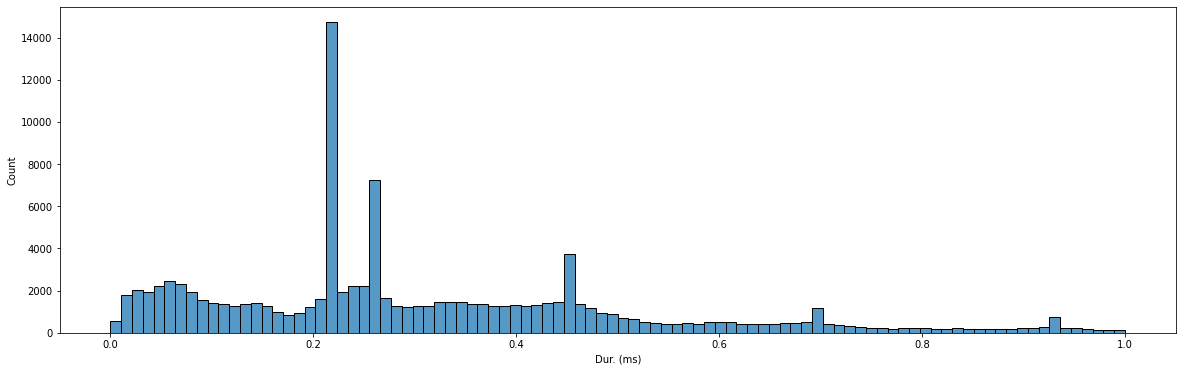

In [38]:
# univariate plots
plt.subplots(figsize=(20, 6))
sns.histplot(df_new['Dur. (ms)'])


Text(0.5, 1.0, 'Total DL (Bytes)')

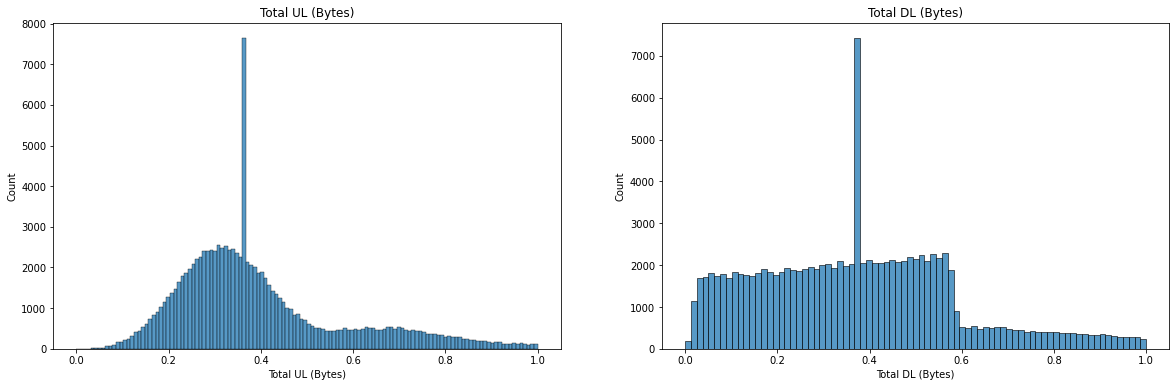

In [39]:
 # univariate plots
fig, ax=plt.subplots(1,2, figsize=(20, 6))
sns.histplot(df_new['Total UL (Bytes)'], ax=ax[0])
ax[0].set_title("Total UL (Bytes)")
sns.histplot(df_new['Total DL (Bytes)'], ax=ax[1])
ax[1].set_title("Total DL (Bytes)")


Text(0.5, 1.0, 'Google total volume')

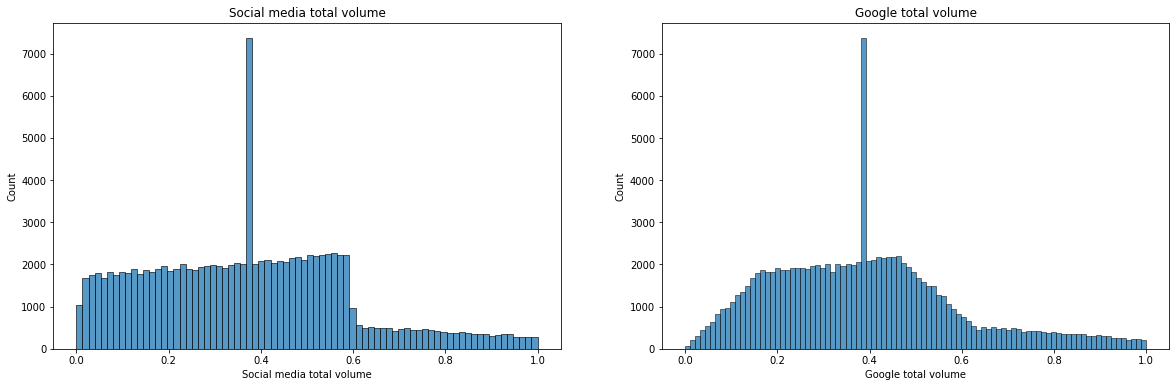

In [40]:
 # univariate plots
fig, ax=plt.subplots(1,2, figsize=(20, 6))
sns.histplot(df_new['Social media total volume'], ax=ax[0])
ax[0].set_title("Social media total volume")
sns.histplot(df_new['Google total volume'], ax=ax[1])
ax[1].set_title("Google total volume")


Text(0.5, 1.0, 'Youtube total volume')

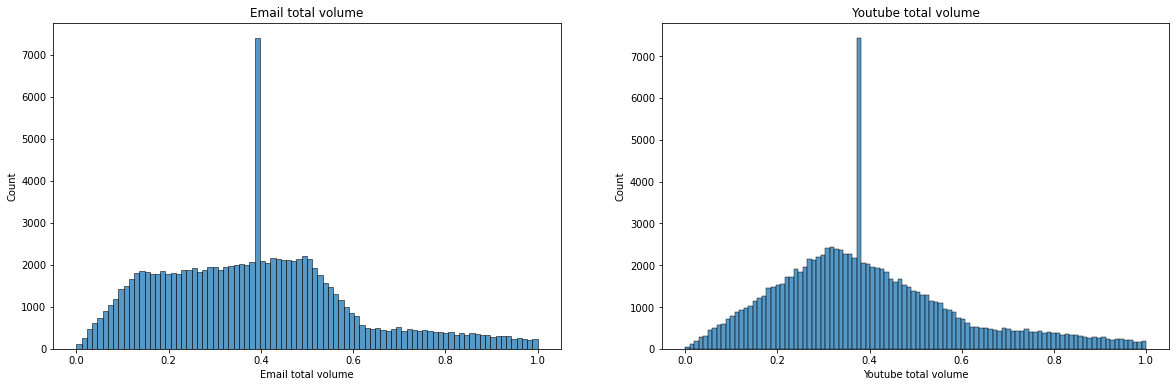

In [41]:
 # univariate plots
fig, ax=plt.subplots(1,2, figsize=(20, 6))
sns.histplot(df_new['Email total volume'], ax=ax[0])
ax[0].set_title("Email total volume")
sns.histplot(df_new['Youtube total volume'], ax=ax[1])
ax[1].set_title("Youtube total volume")


Text(0.5, 1.0, 'Gaming total volume')

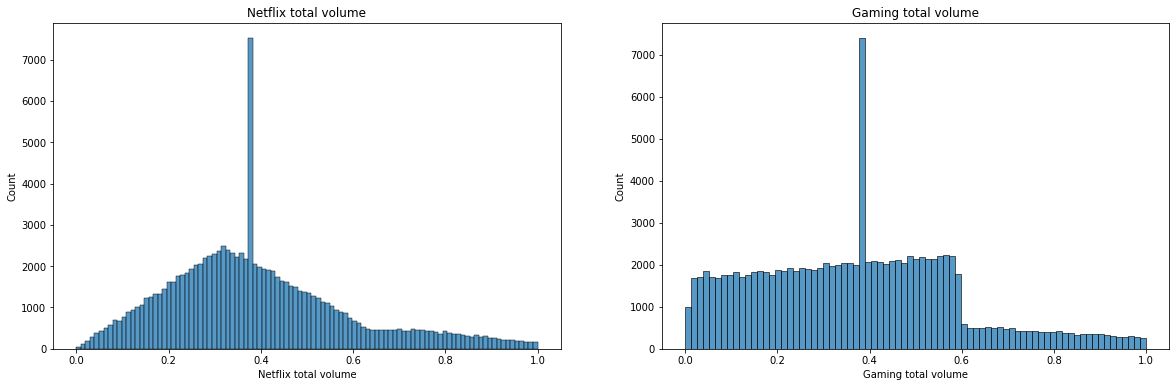

In [42]:
 # univariate plots
fig, ax=plt.subplots(1,2, figsize=(20, 6))
sns.histplot(df_new['Netflix total volume'], ax=ax[0])
ax[0].set_title("Netflix total volume")

sns.histplot(df_new['Gaming total volume'], ax=ax[1])
ax[1].set_title("Gaming total volume")


In [43]:
#bivariate analysis
df_new['Total_DL+UL'] = df_new['Total UL (Bytes)'] + df_new['Total DL (Bytes)']


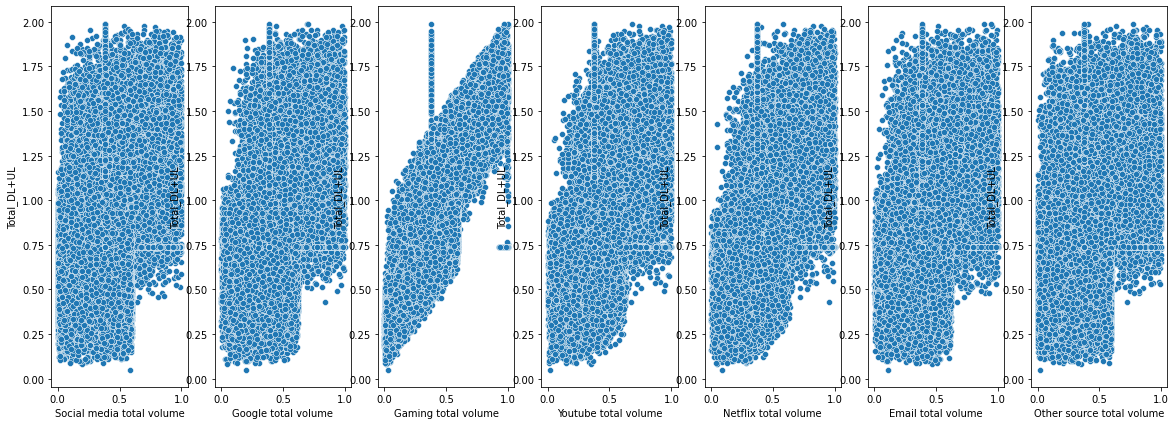

In [44]:
#Scatter plot for social media total, gaming total, and google total for comparasion
a4_dims = (20, 7)
fig, axs = plt.subplots(ncols=7,figsize=a4_dims)
sns.scatterplot(x="Social media total volume", y="Total_DL+UL",ax=axs[0], data=df_new)
sns.scatterplot(x="Google total volume", y="Total_DL+UL", ax=axs[1],data=df_new)
sns.scatterplot(x="Gaming total volume", y="Total_DL+UL",ax=axs[2], data=df_new)
sns.scatterplot(x="Youtube total volume", y="Total_DL+UL",ax=axs[3], data=df_new)
sns.scatterplot(x="Netflix total volume", y="Total_DL+UL",ax=axs[4], data=df_new)
sns.scatterplot(x="Email total volume", y="Total_DL+UL",ax=axs[5], data=df_new)
sns.scatterplot(x="Other source total volume", y="Total_DL+UL",ax=axs[6], data=df_new)
plt.show()

top five decile classes based on the total duration for all sessions and total data (DL+UL) per decile class.

In [45]:
df_new['decile'] = pd.qcut(df_new['Dur. (ms)'], 5, labels=False)

In [46]:
df_new.head()

,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume,Total_DL+UL,decile
2.040471e+14,0.0,0.264407,0.473213,0.046966,0.254024,0.371067,0.460031,0.576551,0.404528,0.029848,0.275142,0.520179,2
2.040808e+14,0.0,0.264407,0.282905,0.125028,0.117374,0.420391,0.208658,0.167638,0.372717,0.124059,0.330656,0.407933,2
2.082001e+14,0.0,0.217257,0.418476,0.015158,0.513338,0.064052,0.505374,0.279424,0.446649,0.006155,0.353539,0.433634,1
2.082001e+14,0.0,0.217904,0.252398,0.258183,0.423592,0.556749,0.532902,0.360910,0.389562,0.239962,0.212742,0.510581,1
2.082001e+14,0.5,0.264407,0.562523,0.640558,0.563325,0.470006,0.770184,0.194169,0.806735,0.640304,0.746519,1.203081,2


In [47]:
total_data_per_decile = df_new.groupby(['decile']).agg({'Total_DL+UL':['sum']})
total_data_per_decile.columns = ["_".join(x) for x in total_data_per_decile.columns.ravel()]

In [48]:
total_data_per_decile

,Total_DL+UL_sum
decile,
0,14241.001335
1,15316.772289
2,15759.421413
3,16249.664599
4,20325.825540
